# IMPORTING THE LIBRARIES

In [35]:
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import numpy as np  # Import NumPy for numerical computations
import seaborn as sea  # Import Seaborn for data visualization
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical variables
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression for building a logistic regression model
from sklearn.metrics import accuracy_score  # Import accuracy_score for evaluating model performance
import warnings  # Import warnings module
warnings.filterwarnings("ignore")  # Ignore any warnings


# GATHERING THE DATA

In [2]:
# Reading the CSV file into a DataFrame named df
df=pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [3]:
# Displaying the first few rows of the DataFrame df
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# ANALYSIS ON DATA

In [4]:
# Obtaining the dimensions of the DataFrame df (number of rows, number of columns)
df.shape

(6362620, 11)

In [5]:
# Displaying concise summary information about the DataFrame df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Counting the occurrences of each unique value in the 'isFraud' column
# 0 represents non-fraudulent transactions, while 1 represents fraudulent transactions
df["isFraud"].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
# Filtering the DataFrame to separate non-fraudulent transactions
non_fraud = df[df["isFraud"] == 0]

# Filtering the DataFrame to separate fraudulent transactions
fraud = df[df["isFraud"] == 1]


In [8]:
# Sampling non-fraudulent transactions to create a subset with the same number of entries as fraudulent transactions
is_fraud_1 = non_fraud.sample(n=8213)

# Counting the occurrences of each unique value in the 'isFraud' column in the subset
is_fraud_1["isFraud"].value_counts()


isFraud
0    8213
Name: count, dtype: int64

In [9]:
# Concatenating the subsets of non-fraudulent transactions (is_fraud_1) and fraudulent transactions (fraud) along axis 0 (rows)
df_new = pd.concat([is_fraud_1, fraud], axis=0)

# Counting the occurrences of each unique value in the 'isFraud' column in the concatenated DataFrame
df_new["isFraud"].value_counts()


isFraud
0    8213
1    8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

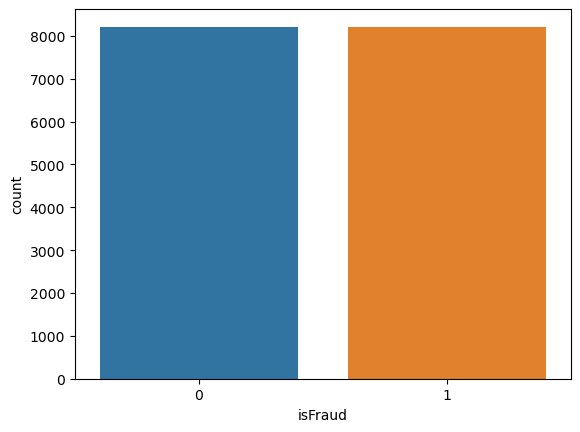

In [10]:
# Creating a count plot using Seaborn to visualize the distribution of the 'isFraud' column in the DataFrame df_new
sea.countplot(x="isFraud", data=df_new)


In [11]:
# Obtaining the dimensions of the DataFrame df_new (number of rows, number of columns)
df_new.shape


(16426, 11)

In [12]:
df_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5622836,395,PAYMENT,31194.41,C749525941,0.00,0.00,M520808676,0.00,0.00,0,0
5834302,402,CASH_IN,32317.84,C1162443235,1104539.18,1136857.01,C848102384,1159185.62,1126867.79,0,0
4407058,322,CASH_OUT,322886.03,C1764906350,7226.00,0.00,C567452972,0.00,322886.03,0,0
3992938,298,CASH_IN,174191.76,C2062745761,2428376.15,2602567.91,C753008293,792441.17,618249.41,0,0
376901,17,CASH_OUT,204443.55,C1713153259,0.00,0.00,C1258007166,387534.91,591978.46,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [13]:
# Resetting the index of the DataFrame df_new inplace
df_new.reset_index(inplace=True)

# Displaying the DataFrame df_new after resetting the index
df_new


,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,5622836,395,PAYMENT,31194.41,C749525941,0.00,0.00,M520808676,0.00,0.00,0,0
1,5834302,402,CASH_IN,32317.84,C1162443235,1104539.18,1136857.01,C848102384,1159185.62,1126867.79,0,0
2,4407058,322,CASH_OUT,322886.03,C1764906350,7226.00,0.00,C567452972,0.00,322886.03,0,0
3,3992938,298,CASH_IN,174191.76,C2062745761,2428376.15,2602567.91,C753008293,792441.17,618249.41,0,0
4,376901,17,CASH_OUT,204443.55,C1713153259,0.00,0.00,C1258007166,387534.91,591978.46,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
16422,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
16423,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
16424,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [14]:
# Dropping the 'index' column from the DataFrame df_new along axis 1 (columns)
df_new.drop("index", axis=1, inplace=True)


In [15]:
# Dropping the 'nameOrig' column from the DataFrame df_new along axis 1 (columns)
df_new.drop("nameOrig", axis=1, inplace=True)

# Dropping the 'nameDest' column from the DataFrame df_new along axis 1 (columns)
df_new.drop("nameDest", axis=1, inplace=True)


In [16]:
# Counting the occurrences of each unique value in the 'type' column of the DataFrame df_new
df_new["type"].value_counts()


type
CASH_OUT    6974
TRANSFER    4799
PAYMENT     2835
CASH_IN     1777
DEBIT         41
Name: count, dtype: int64

In [17]:
# Counting the occurrences of each unique value in the 'step' column of the DataFrame df_new
df_new["step"].value_counts()


step
212    91
19     86
18     81
43     80
306    79
       ..
29      4
708     4
28      4
662     2
112     2
Name: count, Length: 743, dtype: int64

In [18]:
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,395,PAYMENT,31194.41,0.00,0.00,0.00,0.00,0,0
1,402,CASH_IN,32317.84,1104539.18,1136857.01,1159185.62,1126867.79,0,0
2,322,CASH_OUT,322886.03,7226.00,0.00,0.00,322886.03,0,0
3,298,CASH_IN,174191.76,2428376.15,2602567.91,792441.17,618249.41,0,0
4,17,CASH_OUT,204443.55,0.00,0.00,387534.91,591978.46,0,0


In [19]:
# Displaying concise summary information about the DataFrame df_new
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   newbalanceOrig  16426 non-null  float64
 5   oldbalanceDest  16426 non-null  float64
 6   newbalanceDest  16426 non-null  float64
 7   isFraud         16426 non-null  int64  
 8   isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.1+ MB


In [20]:
# Generating descriptive statistics for numerical columns in the DataFrame df_new
df_new.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,304.789419,8.195891e+05,1.227894e+06,5.104432e+05,8.111774e+05,1.236932e+06,0.500000,0.000974
std,193.564031,1.846487e+06,3.241269e+06,2.483640e+06,3.376082e+06,3.724865e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,3.707424e+04,1.022400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,282.000000,1.711097e+05,1.184629e+05,0.000000e+00,0.000000e+00,1.136763e+05,0.500000,0.000000
75%,408.000000,5.402709e+05,7.734583e+05,0.000000e+00,5.011579e+05,1.097598e+06,1.000000,0.000000
max,743.000000,1.362836e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [21]:
# Calculating the sum of missing values for each column in the DataFrame df_new
df_new.isna().sum()


step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [23]:
# Initialize LabelEncoder object
lb = LabelEncoder()


In [24]:
# Using the initialized LabelEncoder to transform the "type" column into numerical labels
type_label = lb.fit_transform(df_new["type"])

# Displaying the transformed labels
type_label


array([3, 0, 1, ..., 1, 4, 1])

In [25]:
# Assigning the transformed numerical labels to the "type" column of the DataFrame df_new
df_new["type"] = type_label

# Displaying the updated DataFrame df_new with the "type" column transformed to numerical labels
df_new


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,395,3,31194.41,0.00,0.00,0.00,0.00,0,0
1,402,0,32317.84,1104539.18,1136857.01,1159185.62,1126867.79,0,0
2,322,1,322886.03,7226.00,0.00,0.00,322886.03,0,0
3,298,0,174191.76,2428376.15,2602567.91,792441.17,618249.41,0,0
4,17,1,204443.55,0.00,0.00,387534.91,591978.46,0,0
...,...,...,...,...,...,...,...,...,...
16421,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
16422,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
16423,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
16424,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [26]:
# Computing the pairwise correlation of columns in the DataFrame df_new
df_corr = df_new.corr()


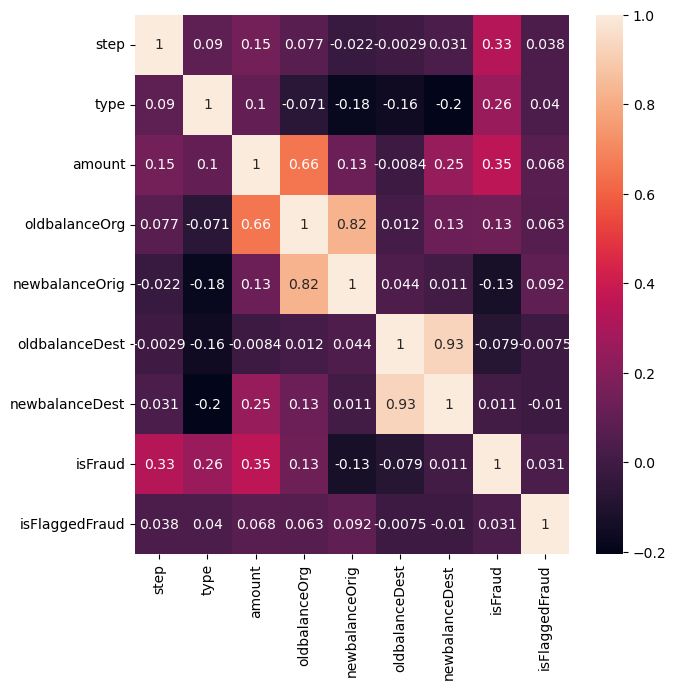

In [27]:
# Creating a figure and axis for the heatmap plot with specified figsize
fig, ax = plt.subplots(figsize=(7, 7))

# Generating a heatmap of the correlation matrix with Seaborn
# annot=True displays the correlation values on the heatmap
sea.heatmap(df_corr, ax=ax, annot=True)

# Displaying the heatmap
plt.show()


In [28]:
# Counting the occurrences of each unique value in the 'type' column of the DataFrame df_new
df_new["type"].value_counts()


type
1    6974
4    4799
3    2835
0    1777
2      41
Name: count, dtype: int64

In [29]:
# Assigning features (independent variables) to the variable x
x = df_new.iloc[:, :-2]

# Assigning the target variable (dependent variable) to the variable y
y = df_new["isFraud"]

# Displaying the features (independent variables) x
x


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,395,3,31194.41,0.00,0.00,0.00,0.00
1,402,0,32317.84,1104539.18,1136857.01,1159185.62,1126867.79
2,322,1,322886.03,7226.00,0.00,0.00,322886.03
3,298,0,174191.76,2428376.15,2602567.91,792441.17,618249.41
4,17,1,204443.55,0.00,0.00,387534.91,591978.46
...,...,...,...,...,...,...,...
16421,743,1,339682.13,339682.13,0.00,0.00,339682.13
16422,743,4,6311409.28,6311409.28,0.00,0.00,0.00
16423,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
16424,743,4,850002.52,850002.52,0.00,0.00,0.00


In [30]:
# Splitting the data into training and testing sets
# x_train: features for training
# x_test: features for testing
# y_train: target variable for training
# y_test: target variable for testing
# stratify=y ensures that the proportion of classes in the target variable is similar in both training and testing sets
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=3 sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=3)


# CHOOSING THE MODEL

In [31]:
# Initializing a Logistic Regression model
lr = LogisticRegression()


In [32]:
# Fitting the Logistic Regression model to the training data
lr.fit(x_train, y_train)


LogisticRegression()

In [33]:
# Predicting the target variable using the trained model on the training data
x_train_pred = lr.predict(x_train)

# Calculating the accuracy of the predictions on the training data
x_train_accuracy = accuracy_score(x_train_pred, y_train)

# Printing the accuracy score
print("Training Accuracy:", x_train_accuracy)


Training Accuracy: 0.9035007610350076


In [34]:
# Predicting the target variable using the trained model on the testing data
x_test_pred = lr.predict(x_test)

# Calculating the accuracy of the predictions on the testing data
x_test_accuracy = accuracy_score(x_test_pred, y_test)

# Printing the accuracy score
print("Testing Accuracy:", x_test_accuracy)


Testing Accuracy: 0.8995739500912964


# PREDICTION WITH EXAMPLE INPUT DATA

In [36]:
# Example input data including all relevant features
input_data = (1, "CASH_OUT", 181, 181, 0, 21182, 0)

# Mapping of transaction types to numerical values
transaction_type_mapping = {
    'CASH_IN': 0,
    'CASH_OUT': 1,
    'DEBIT': 2,
    'PAYMENT': 3,
    'TRANSFER': 4
}

# Map transaction type to numerical value
input_data_list = list(input_data)
input_data_list[1] = transaction_type_mapping[input_data_list[1]]

# Convert to numpy array
temp = np.array(input_data_list).reshape(1, -1)

# Predict using the logistic regression model
prediction = lr.predict(temp)

# Print the prediction result
if prediction[0] == 1:
    print("FRAUD")
else:
    print("NOT FRAUD")


FRAUD
